# Let's prepare the data

## Prepare y

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
plt.style.use('seaborn-whitegrid')

In [14]:
df = pd.read_csv('dataset/gt.csv')
n_range = [0,2,2.4,3,math.inf]
k_range = [0,0.75,0.90,1.2,math.inf]
# df

# Check normality of N

In [15]:
print("min:",min(df["N"]))
print("max:",max(df["N"]))
print("mean:",np.mean(df["N"]))
print("std:",np.std(df["N"]))

print()

k2, p = stats.normaltest(df['N'])
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


min: 0.243
max: 3.834
mean: 2.3546955555555558
std: 0.3138702856316111

p = 4.24718e-19
The null hypothesis can be rejected


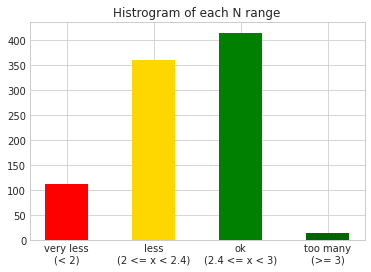

In [16]:
counts, bins = np.histogram(df['N'], bins=n_range)
# print(counts,bins)
plt.bar(np.arange(len(counts)), counts, tick_label=['very less\n(< 2)','less\n(2 <= x < 2.4)','ok\n(2.4 <= x < 3)','too many\n(>= 3)']  ,width=0.5,color=['r','gold','g','darkgreen'])
plt.title('Histrogram of each N range')
plt.show()

# Check normality of K

In [17]:
for i in df["K"]:
    try:
        float(i)
    except:
        print(i)

In [18]:
print("min:",min(df["K"]))
print("max:",max(df["K"]))
print("mean:",np.mean(df["K"]))
print("std:",np.std(df["K"]))

print()

k2, p = stats.normaltest(df['K'])
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


min: 0.014
max: 1.505
mean: 0.7415611111111111
std: 0.19228661373321765

p = 1.28766e-10
The null hypothesis can be rejected


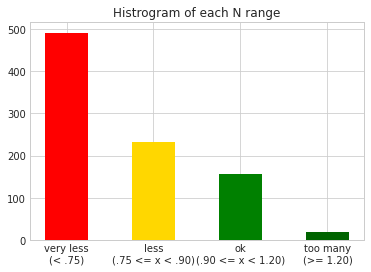

In [19]:
counts, bins = np.histogram(df['K'], bins=k_range)
# print(counts,bins)
# k_range = [0,0.75,0.90,1.2,math.inf]
plt.bar(np.arange(len(counts)), counts, tick_label=['very less\n(< .75)','less\n(.75 <= x < .90)','ok\n(.90 <= x < 1.20)','too many\n(>= 1.20)']  ,width=0.5,color=['r','gold','g','darkgreen'])
plt.title('Histrogram of each N range')
plt.show()

## Filter K

In [20]:
df_filt = pd.read_csv('dataset/note_k.csv').drop(columns='Unnamed: 1')

In [30]:
import pickle
with open('dataset/k17_filter.pickle', 'wb') as handle:
    pickle.dump(list(df_filt[df_filt['Not_related_17'] == 1.0]['ID']), handle, protocol=pickle.HIGHEST_PROTOCOL)

In [33]:
with open('dataset/k33_filter.pickle', 'wb') as handle:
    pickle.dump(list(df_filt[df_filt['Not_related_33'] == 1.0]['ID']), handle, protocol=pickle.HIGHEST_PROTOCOL)

## Prepare X

### N17

In [8]:
from os import walk
path = 'dataset/n17'
_, _, filenames = next(walk(path))

print("File sample:", f'{path}/{filenames[0]}')
print("Number of samples:", len(filenames))

temp = set()
for f in filenames:
    if(len(f.split('_'))  != 3):
        print(f'{path}/{f}')
    temp.add(f.split('_')[0])

print("Number of trees:", len(temp))



File sample: dataset/n17/N31_17_1.JPG
Number of samples: 1018
Number of trees: 344


### N33

In [10]:
from os import walk
path = 'dataset/n33'
_, _, filenames = next(walk(path))

print("File sample:", f'{path}/{filenames[0]}')
print("Number of samples:", len(filenames))

temp = set()
for f in filenames:
    if(len(f.split('_'))  != 3):
        print(f'{path}/{f}')
    temp.add(f.split('_')[0])

print("Number of trees:", len(temp))



File sample: dataset/n33/N31_33_4.JPG
Number of samples: 1018
Number of trees: 348


In [12]:
from os import walk
path = 'dataset/k17'
_, _, filenames = next(walk(path))

print("File sample:", f'{path}/{filenames[0]}')
print("Number of samples:", len(filenames))

temp = set()
for f in filenames:
    if(len(f.split('_'))  != 3):
        print(f'{path}/{f}')
    temp.add(f.split('_')[0])

print("Number of trees:", len(temp))



File sample: dataset/k17/K99_17_4.JPG
Number of samples: 900
Number of trees: 323


In [13]:
from os import walk
path = 'dataset/k33'
_, _, filenames = next(walk(path))

print("File sample:", f'{path}/{filenames[0]}')
print("Number of samples:", len(filenames))

temp = set()
for f in filenames:
    if(len(f.split('_'))  != 3):
        print(f'{path}/{f}')
    temp.add(f.split('_')[0])

print("Number of trees:", len(temp))



File sample: dataset/k33/K100_33_2.JPG
Number of samples: 872
Number of trees: 322


In [9]:
# import os
# os.rename(r'dataset/n17/N50-17_2.JPG',r'dataset/n17/N50_17_2.JPG')
# os.rename(r'dataset/n17/N50-17_4.JPG',r'dataset/n17/N50_17_4.JPG')
# os.rename(r'dataset/n17/N50-17_5.JPG',r'dataset/n17/N50_17_5.JPG')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/n17/N50-17_2.JPG' -> 'dataset/n17/N50_17_2.JPG'

In [38]:
from os import walk
_, _, filenames = next(walk('dataset/k17'))

In [45]:
import pickle
with open('dataset/k17_filter.pickle', 'rb') as handle:
    filt_list = pickle.load(handle)
print(filt_list)
for name in filenames:
    if(int(name.split('_')[0][1:3]) in filt_list):
        print(name)
    # break

[24, 27, 36, 38, 40, 48, 51, 54, 60, 61, 62, 64, 65, 68, 71, 72, 73, 74, 75, 77, 79, 81, 84, 85, 87, 88, 91, 97, 158, 159, 160, 162, 163, 164, 165, 166, 168, 173, 180, 216, 218, 219, 221, 224, 225, 226, 228, 230, 231, 232, 236, 237, 240, 241, 243, 245, 246, 249, 250, 251, 258, 260, 261, 262, 263, 264, 265, 266, 267, 269, 274, 305, 308, 309, 310, 311, 312, 315, 317, 319, 322, 323, 324, 325, 326, 327, 328, 330, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 351, 352, 353, 354, 355, 356, 359, 360, 361, 362, 364, 367, 368, 370, 371, 372, 373, 376, 377, 378, 380, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 398, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 413, 414, 416, 417, 419, 420, 424, 425, 427, 429, 431, 432, 434, 436, 438, 440, 441, 442, 444, 445, 446, 448, 449, 450]
K97_17_3.JPG
K97_17_4.JPG
K97_17_5.JPG
K91_17_2.JPG
K91_17_3.JPG
K91_17_1.JPG
K88_17_2.JPG
K88_17_1.JPG
K85_17_4.JPG
K85_17_3.JPG
K85_17_2.JPG
K87_17_4.JPG
K88_17_3.JPG
K87